STEP 1: Importing libraies and Data Set


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# 1. Load Data & Initial Inspection
df = pd.read_csv("titanic.csv")
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Add this line to check the column names in the DataFrame
print("\nDataFrame Columns:", df.columns)

# 2. Summary Statistics
print("\nSummary Stats:\n", df.describe(include='all'))
# 3. Handle Missing Values (Simple Imputation for EDA)
df['Age'].fillna(df['Age'].median(), inplace=True)

# Before attempting to access 'Embarked', ensure it exists
if 'Embarked' in df.columns:
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
else:
    print("\nWarning: 'Embarked' column not found in the DataFrame.")

Data Shape: (887, 8)

Data Types:
 Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Missing Values:
 Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

DataFrame Columns: Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

Summary Stats:
           Survived      Pclass                Name   Sex         Age  \
count   887.000000  887.000000                 887   887  887.000000   
unique         NaN         NaN                 887     2         NaN   
top         

/tmp/ipython-input-2-3804834648.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


STEP 2: Distribution Analysis

Text(0.5, 1.0, 'Survival by Gender')

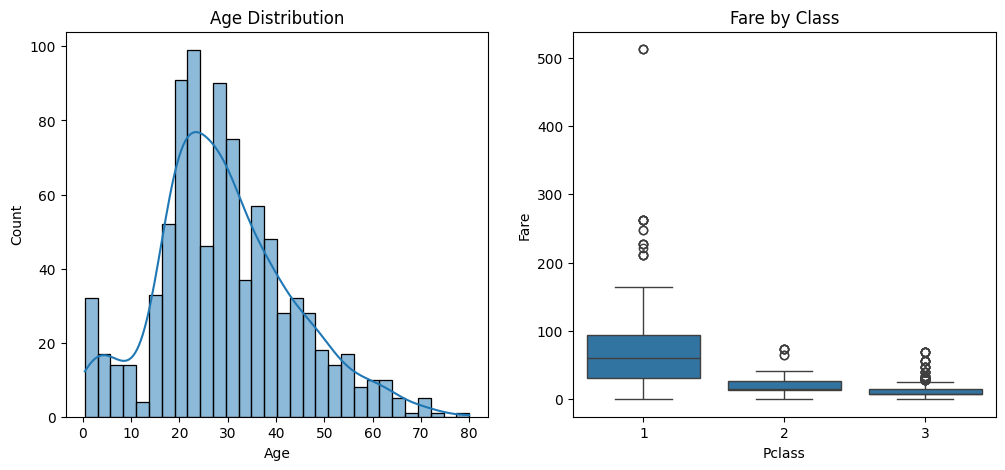

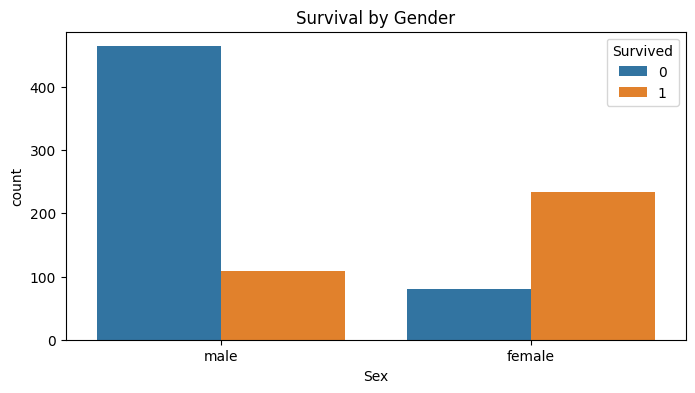

In [3]:
# Numerical Features (Histograms + Boxplots)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Age'], bins=30, kde=True, ax=ax[0]).set_title('Age Distribution')
sns.boxplot(x='Pclass', y='Fare', data=df, ax=ax[1]).set_title('Fare by Class')
# Categorical Features (Countplots)
plt.figure(figsize=(8, 4))
sns.countplot(x='Sex', hue='Survived', data=df).set_title('Survival by Gender')

STEP 3: Correlation & Relationships

Survived,0,1
Pclass,,
1,37.037037,62.962963
2,52.717391,47.282609
3,75.564682,24.435318


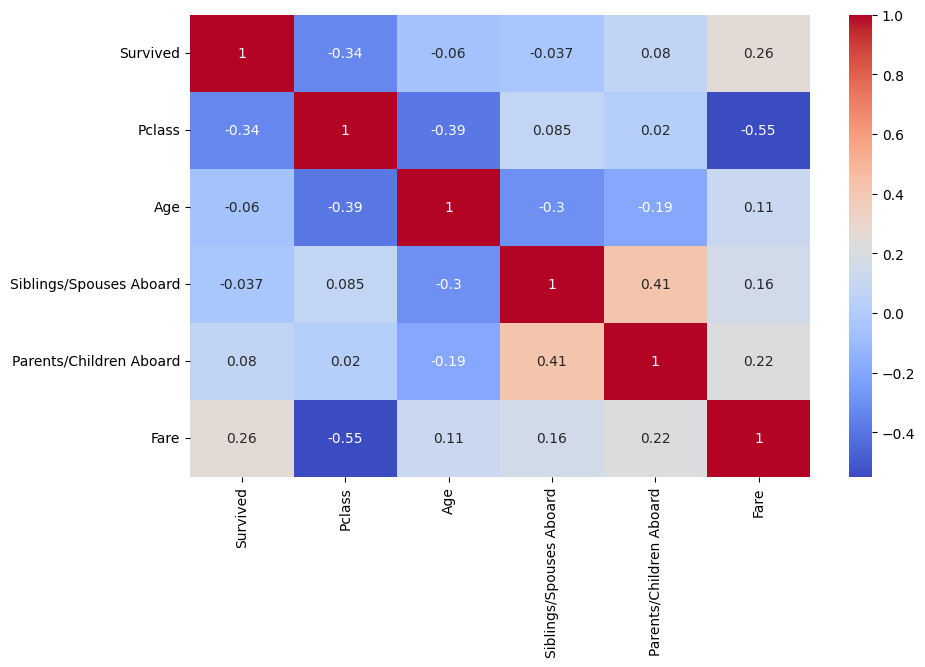

In [4]:
# Correlation Matrix (Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
# Cross-Tabulation (Categorical Relationships)
pd.crosstab(df['Pclass'], df['Survived'], normalize='index') * 100

STEP 4: Outlier Detection

Found 20 fare outliers


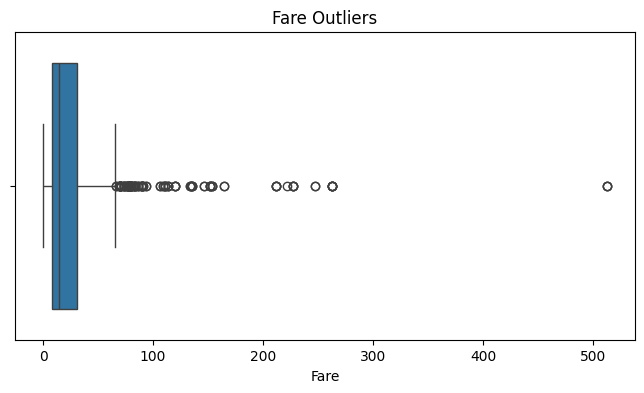

In [5]:
# Boxplot for Fare Outliers
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Fare']).set_title('Fare Outliers')
# Z-Score Analysis
from scipy import stats
z_scores = np.abs(stats.zscore(df['Fare']))
outliers = df[z_scores > 3]
print(f"Found {len(outliers)} fare outliers")

STEP 5: Advanced Visualizations

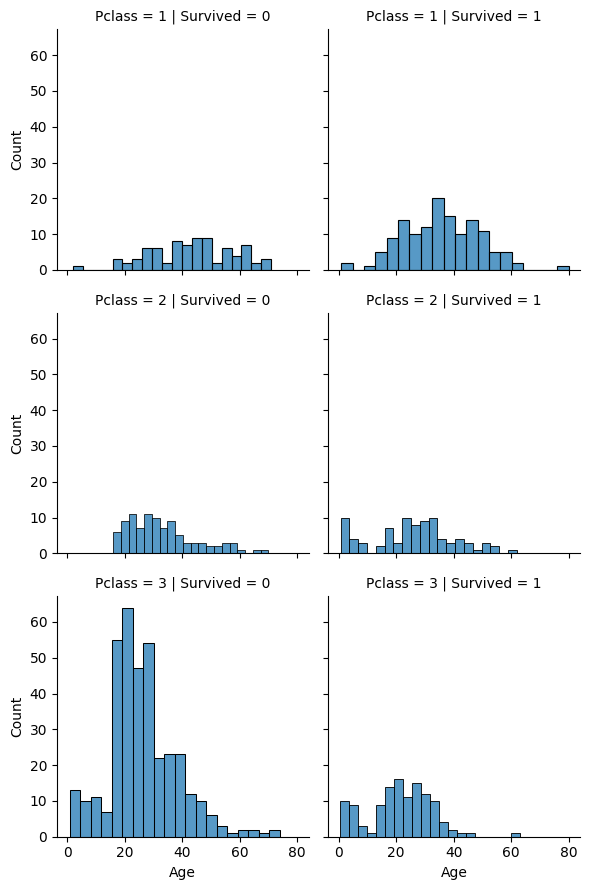

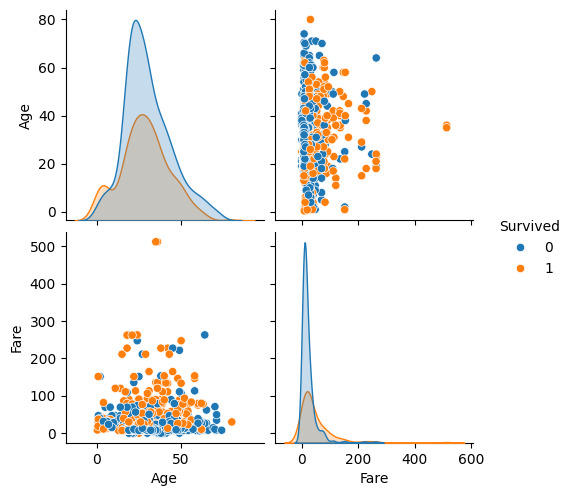

In [6]:
# Faceted Analysis
g = sns.FacetGrid(df, col='Survived', row='Pclass', height=3)
g.map(sns.histplot, 'Age', bins=20)
# Pairplot for Multivariate Analysis
# Removed 'Parch' as it was causing a KeyError
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived')